<a href="https://colab.research.google.com/github/dhruv0730/Algo-DS-Project-1/blob/main/Linear_Regression_with_Activation_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Implementation of Linear Regression with Activation and Optimization using Scikit-Learn along with NumPy.

    Scikit-Learn's LinearRegression does not explicitly support activation functions
    so we will manually apply an activation function after making predictions.
    
    For optimization, we will use Gradient Descent via SGDRegressor.

    Import Required Libraries

In [ ]:
from sklearn.pipeline import make_pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Display the first few rows
print(iris.head())



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


    Generate Synthetic Data

In [ ]:
# Load the Iris dataset
iris = sns.load_dataset("iris")

# Selecting features and target for regression
X = iris.drop(columns=["species", "petal_length"])  # Use all numerical features except petal_length
y = iris["petal_length"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better optimization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



    Train Model Using SGD & Track Loss

In [ ]:
# Initialize SGDRegressor
sgd = SGDRegressor(loss="squared_error", learning_rate="constant", eta0=0.01, max_iter=1, tol=None, random_state=42)

# Store loss values over epochs
loss_values = []

# Train the model for 1000 iterations manually
for i in range(1000):
    sgd.partial_fit(X_train_scaled, y_train)  # Perform one epoch of training
    y_pred = sgd.predict(X_train_scaled)
    loss = mean_squared_error(y_train, y_pred)  # Compute MSE loss
    loss_values.append(loss)  # Store loss



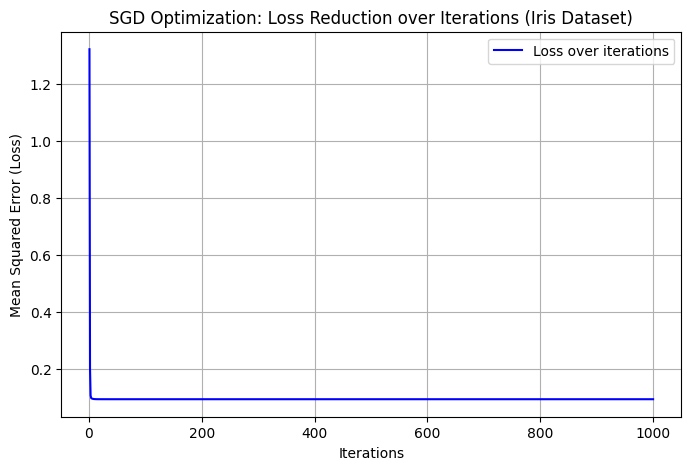

In [ ]:
# Plot loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, 1001), loss_values, label="Loss over iterations", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("SGD Optimization: Loss Reduction over Iterations (Iris Dataset)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Evaluate on Test Data
y_test_pred = sgd.predict(X_test_scaled)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Final Test Loss (MSE): {test_loss:.4f}")


Final Test Loss (MSE): 0.1319
